In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/SsMm/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/SsMm/Fish3_CCB.mm', '/media/cjw/Data/cyto/SsMm/snail4_ice.mm', '/media/cjw/Data/cyto/SsMm/snail1_phago.mm', '/media/cjw/Data/cyto/SsMm/Fish4_ICE.mm', '/media/cjw/Data/cyto/SsMm/snail5_no_bact.mm', '/media/cjw/Data/cyto/SsMm/Mouse1_Phago.mm', '/media/cjw/Data/cyto/SsMm/Fish3_Untreated.mm', '/media/cjw/Data/cyto/SsMm/snail3_phago.mm', '/media/cjw/Data/cyto/SsMm/Fish6_Untreated.mm', '/media/cjw/Data/cyto/SsMm/snail1_edta.mm', '/media/cjw/Data/cyto/SsMm/snail1_no_bact.mm', '/media/cjw/Data/cyto/SsMm/snail2_edta.mm', '/media/cjw/Data/cyto/SsMm/Fish2_Untreated.mm', '/media/cjw/Data/cyto/SsMm/Fish1_Ice.mm', '/media/cjw/Data/cyto/SsMm/snail5_ice.mm', '/media/cjw/Data/cyto/SsMm/snail3_no_bact.mm', '/media/cjw/Data/cyto/SsMm/Fish5_Untreated.mm', '/media/cjw/Data/cyto/SsMm/Fish6_ICE.mm', '/media/cjw/Data/cyto/SsMm/Mouse1_Ice.mm', '/media/cjw/Data/cyto/SsMm/Mouse3_Ice.mm', '/media/cjw/Data/cyto/SsMm/Fish4_CCB.mm', '/media/cjw/Data/cyto/SsMm/snail5_edta.mm', '/media/cjw/Data/

dict_keys(['Fish3_CCB.mm', 'snail4_ice.mm', 'snail1_phago.mm', 'Fish4_ICE.mm', 'snail5_no_bact.mm', 'Mouse1_Phago.mm', 'Fish3_Untreated.mm', 'snail3_phago.mm', 'Fish6_Untreated.mm', 'snail1_edta.mm', 'snail1_no_bact.mm', 'snail2_edta.mm', 'Fish2_Untreated.mm', 'Fish1_Ice.mm', 'snail5_ice.mm', 'snail3_no_bact.mm', 'Fish5_Untreated.mm', 'Fish6_ICE.mm', 'Mouse1_Ice.mm', 'Mouse3_Ice.mm', 'Fish4_CCB.mm', 'snail5_edta.mm', 'Mouse1_Ccb.mm', 'Fish6_CCB.mm', 'Mouse2_Ccb.mm', 'snail5_phago.mm', 'snail4_no_bact.mm', 'Fish2_CCB.mm', 'Fish1_Untreated.mm', 'Fish4_Untreated.mm', 'Fish2_ICE.mm', 'Fish5_CCB.mm', 'snail2_ice.mm', 'Mouse2_Phago.mm', 'Mouse3_Phago.mm', 'snail3_ice.mm', 'snail3_edta.mm', 'snail4_edta.mm', 'Fish3_ICE.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm', 'snail2_phago.mm', 'snail4_phago.mm', 'snail1_ice.mm', 'Mouse3_Ccb.mm', 'snail2_no_bact.mm', 'Mouse2_Ice.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    #print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 4), dtype=float32) (?, 32, 32, 4)
isize:  4 32
dh0 (?, 32, 32, 4)
455465 3558 128
454953 512
Epoch:  0 Iteration:  0 Loss:  617.9862 613.0084 4.9777865


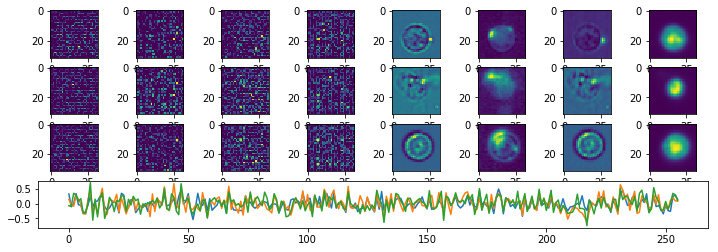

Epoch:  0 Iteration:  1000 Loss:  12.281394 11.811644 0.46975076


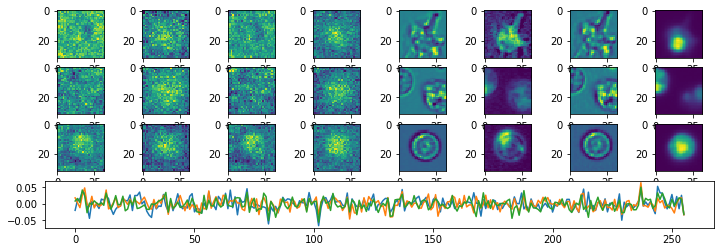

KeyboardInterrupt: 

In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0,1,3,4]
p_nepochs = 80
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.85
p_stdev = .04
p_slam = .001
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-08-06-SS/"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir)

In [5]:
x = 4
x

4